# [Makemore](https://youtu.be/PaCmpygFfXo?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

## Imports

In [1]:
import torch
import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Bi-gram Character level Language Model - Count Method

## Reading and analyzing the data

In [4]:
with open('./data/names_makemore.txt', 'r') as f:
    words = f.readlines()
    words = [name.strip() for name in words]

In [5]:
words[:3]

['emma', 'olivia', 'ava']

In [6]:
len(words), min(len(w) for w in words), max(len(w) for w in words)

(32033, 2, 15)

## With two special characters [i.e. \<S\> and \<E\>]

In [7]:
bigram_frequency = {}

for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(chars, chars[1:]):
        bigram = (char1, char2)
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

In [9]:
sorted(bigram_frequency.items(), key=lambda kv:kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
dim1 = set([x[0] for x in bigram_frequency.keys()])
dim2 = set([x[1] for x in bigram_frequency.keys()])
dim = len(dim1.union(dim2))
del dim1, dim2

In [11]:
dim

28

In [12]:
vocab = sorted(set(''.join(words)))

string_to_int = {s:i for i, s in enumerate(vocab)}
string_to_int['<S>'] = 26 
string_to_int['<E>'] = 27

int_to_string = {i:s for s, i in string_to_int.items()}

In [13]:
print(string_to_int)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


In [14]:
print(int_to_string)

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


## Creating a Count based probability Model with 2 two special characters

In [15]:
N = torch.zeros((dim, dim), dtype=torch.int32)

In [16]:
for word in words:
    chars = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(chars, chars[1:]):
        index_of_char1 = string_to_int[char1]
        index_of_char2 = string_to_int[char2]

        N[index_of_char1, index_of_char2] += 1

### Visualisation

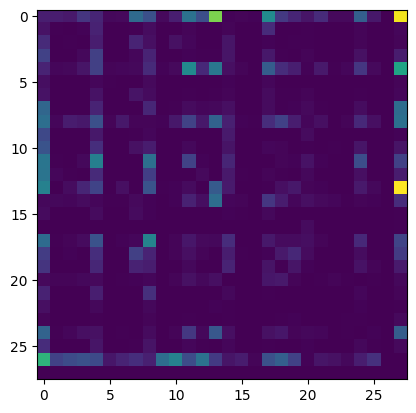

In [17]:
plt.imshow(N)

(-0.5, 27.5, 27.5, -0.5)

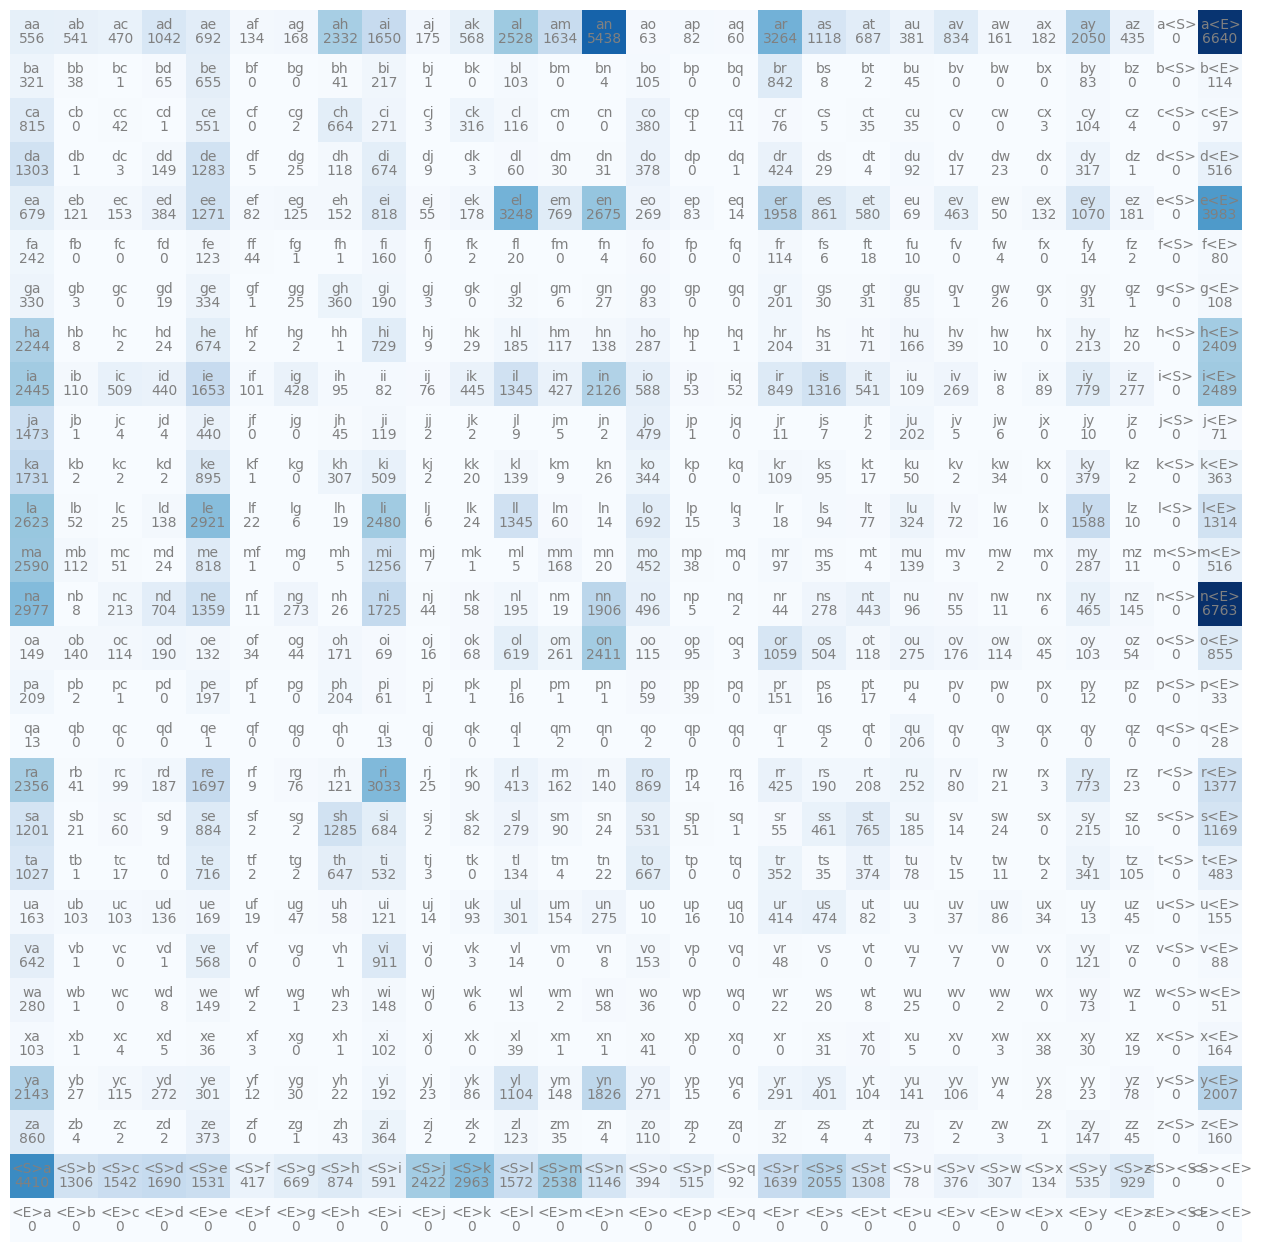

In [18]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(dim):
    for j in range(dim):
        chstr = int_to_string[i] + int_to_string[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')

- We can see that the last row and the second last column is all zero.
- We can get away with this by using a single seperator instead of 2 (i.e, \<S\> and \<E\>)

## With one special characters [i.e. "."]

In [19]:
bigram_frequency = {}

for word in words:
    chars = ['.'] + list(word) + ['.']
    for char1, char2 in zip(chars, chars[1:]):
        bigram = (char1, char2)
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0) + 1

In [20]:
dim1 = set([x[0] for x in bigram_frequency.keys()])
dim2 = set([x[1] for x in bigram_frequency.keys()])
dim = len(dim1.union(dim2))
del dim1, dim2

In [21]:
dim

27

In [22]:
vocab = sorted(set(''.join(words)))

string_to_int = {s:i+1 for i, s in enumerate(vocab)}
string_to_int['.'] = 0 
int_to_string = {i:s for s, i in string_to_int.items()}

In [23]:
print(string_to_int)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [24]:
print(int_to_string)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


## Creating a Count based probability Model with One special character

In [25]:
N = torch.zeros((dim, dim), dtype=torch.int32)

for word in words:
    chars = ['.'] + list(word) + ['.']
    for char1, char2 in zip(chars, chars[1:]):
        index_of_char1 = string_to_int[char1]
        index_of_char2 = string_to_int[char2]

        N[index_of_char1, index_of_char2] += 1

In [26]:
N.shape

torch.Size([27, 27])

### Visualisation

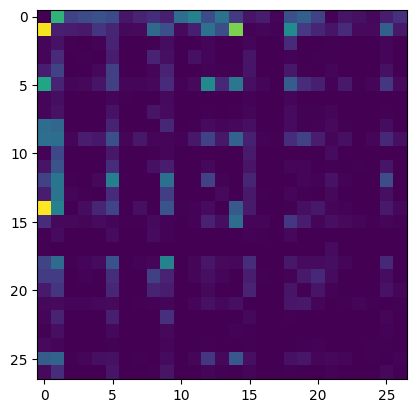

In [27]:
plt.imshow(N)

(-0.5, 26.5, 26.5, -0.5)

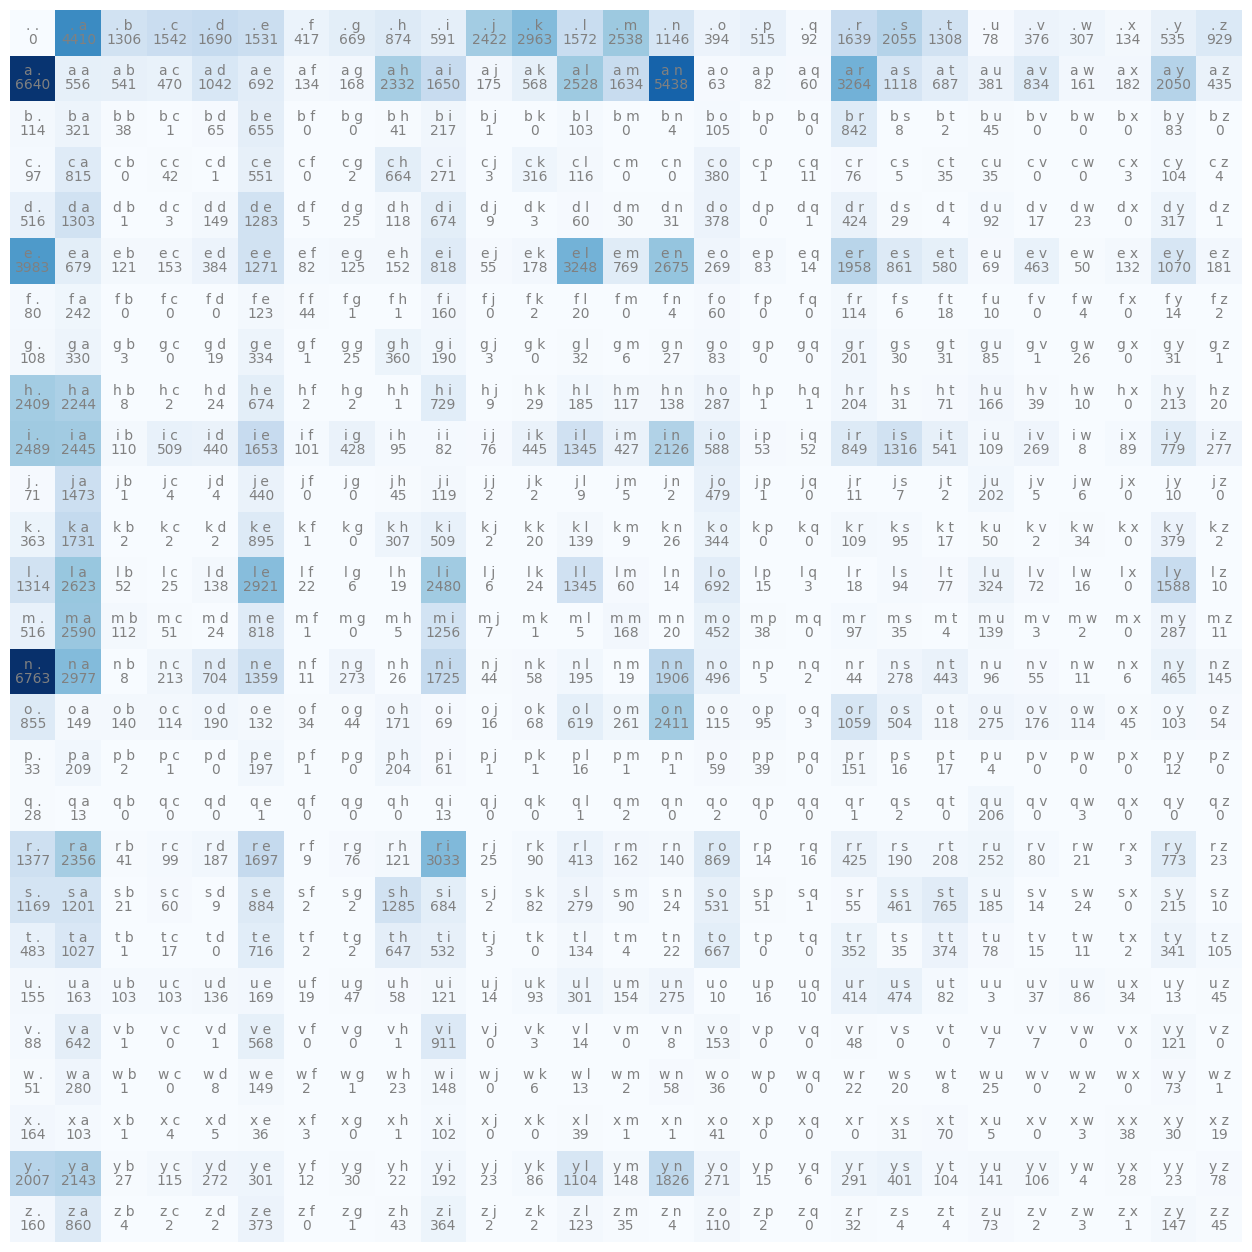

In [28]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(dim):
    for j in range(dim):
        chstr = int_to_string[i] + ' ' + int_to_string[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')

## Prediction/Inferincing from the model

### Scratchpad

In [34]:
p = N[0].float()
p = p / p.sum()
p.shape, p

(torch.Size([27]),
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]))

In [37]:
g = torch.Generator().manual_seed(2147483647)

p = torch.rand(3, generator=g)
p, p.sum().item()

(tensor([0.7081, 0.3542, 0.1054]), 1.1678001880645752)

In [31]:
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [39]:
ix = torch.multinomial(input=p, num_samples=100, replacement=True, generator=g)

print(ix[:30])

ix.tolist().count(0), ix.tolist().count(1), ix.tolist().count(2)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0])


(61, 33, 6)

### Main

In [41]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    ix = 0
    out = []
    while True:
        # Trained Model
        p = N[ix].float()
        p = p / p.sum()

        # Un-trained model: Uncomment below line to use untrained model
        # p = torch.ones(dim) / dim  # Equal distribution | All characters are having equal likelyhood of getting selected.

        ix = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_string[ix])
    
        if ix==0:
            break

    print(''.join(out))

junide.
janasah.
p.
cony.
a.


### Main Optimised

In [42]:
# P = N.float()
# We are adding 1 to all the values in the probality matrix so that no value is 0 in the matrix, as log of 0 going down will give -inf 
# This step is also called Model Smoothening
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [43]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()
        out.append(int_to_string[ix])
    
        if ix==0:
            break

    print(''.join(out))

junide.
janasah.
p.
cony.
a.


# Model Evaluation

In [44]:
print(f'If model does not learn anything the probability would be: {1/27:.4f}')

If model does not learn anything the probability would be: 0.0370


In [45]:
# Maximum Likelihood Probability is used to evalueate the output of the model - Higher the better. 
# We use logprob
# log(a*b*c) = log(a) + log(b) + log(c)
# https://www.wolframalpha.com/input?i=log%28x%29+from+0+to+1https://www.wolframalpha.com/input?i=log%28x%29+from+0+to+1

# We use negative log likelihood (average) to evaluate the output from the model - The lower the Better

In [46]:
# GOAL: maximize likelihood of the data w.r.t. model paramenters (statistical modelilng)
# equivalent to miximizing the log likelihood (because log is monotonic) (scaling)
# ezuivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood (in practice)

# log(a*b*c) = log(a) + log(b) + log(c)

In [47]:
log_likelihood = 0
n = 0
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = string_to_int[ch1]
        ix2 = string_to_int[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'[+] {log_likelihood.item()=:.4f}')
neg_log_likelihood = -log_likelihood
print(f'[+] {neg_log_likelihood.item()=:.4f}')
print(f'[+] Average {(neg_log_likelihood/n).item()=:.4f}')

[+] log_likelihood.item()=-559951.5625
[+] neg_log_likelihood.item()=559951.5625
[+] Average (neg_log_likelihood/n).item()=2.4544


# Neural Network - Bi-gram Character level Language Model - Count Method

## Creating the training set of bigrams with one special character

In [58]:
xs, ys = [], []

for word in words[:1]:
    chars = ['.'] + list(word) + ['.']
    print(f'[+] {word=}')
    
    for char1, char2 in zip(chars, chars[1:]):
        index_of_char1 = string_to_int[char1]
        index_of_char2 = string_to_int[char2]
        
        print(f'\t {char1} --> {char2} | {index_of_char1:<2} --> {index_of_char2}')
        
        xs.append(index_of_char1)
        ys.append(index_of_char2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

[+] word='emma'
	 . --> e | 0  --> 5
	 e --> m | 5  --> 13
	 m --> m | 13 --> 13
	 m --> a | 13 --> 1
	 a --> . | 1  --> 0


In [49]:
print(f'{xs.shape=}\n{xs=}')

xs.shape=torch.Size([5])
xs=tensor([ 0,  5, 13, 13,  1])


In [50]:
print(f'{ys.shape=}\n{ys=}')

ys.shape=torch.Size([5])
ys=tensor([ 5, 13, 13,  1,  0])


## One-Hot Encoding the input data for Neural Network

In [51]:
# Input to the network: one-hot encoding
x_encoded = F.one_hot(
    tensor=xs,  # torch.Size([5])
    num_classes=dim  # 27
).float()

In [54]:
x_encoded[0].shape, x_encoded[0]

(torch.Size([27]),
 tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [55]:
x_encoded

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Visualising encoding (number of sample = 5)

In [59]:
x_ticks = [int_to_string[a] for a in range(27)]
print(x_ticks)

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


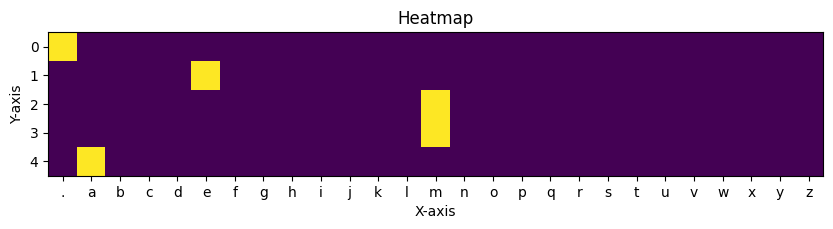

In [60]:
# Plot the heatmap
plt.figure(figsize=(10, 10))
plt.imshow(x_encoded, cmap='viridis', interpolation='nearest')
# plt.colorbar(label='Value')
plt.title('Heatmap')
plt.xlabel('X-axis')
plt.xticks(np.arange(len(x_ticks)), x_ticks)
plt.ylabel('Y-axis')
plt.yticks(np.arange(len(x_encoded)))
plt.show()

## Scratchpad

In [61]:
# Randomly initialize 27 neurons' weights. 
# Each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
no_of_neuron = 27

W = torch.randn(size=(dim, no_of_neuron), generator=g)

In [62]:
W.shape

torch.Size([27, 27])

In [63]:
W

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [-6.7006e-01, -1.2199e+00,  3.0314e-01, -1.0725e+00,  7.2762e-01,
          5.1114e-02,  1.3095e+00, -8.0220e-01, -8.5042e-01, -1.8068e+00,
          1.2523e+00, -1.2256e+00,  1.2165e+00, -9.6478e-01, -2.3211e-01,
         -3.4762e-01,  3.3244e-01, -1.3263e+00,  1.1224e+00,  5.9641e-01,
          4.5846e-01,  5.4011e-02, -1.7400e+00,  1.1560e-01,  8.0319e-01,
          5.4108e-01, -1.1646e+00],
        [ 1.4756e-01, -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01,
         -7.8305e-01,  1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,
          9.3743e-01, -8.8303e-01,  1.74

In [64]:
# Forward Pass

# Matrix multiplication
# @ --> matrix multiplication and * --> dot product (normal multiplication)
# (5, 27) @ (27, 1)  --> (5, 1)
# (5, 27) @ (27, 27) --> (5, 27)

logits = x_encoded @ W  # log-counts
counts = logits.exp()  # counts, equivalent N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
# BTW: the last 2 lined here are together called a 'softmax'

In [65]:
probs.shape

torch.Size([5, 27])

In [66]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [67]:
probs[0].sum()

tensor(1.0000)

In [68]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

In [69]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [72]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index

    print('-'*30)
    print(f'bigram example {i}: {int_to_string[x]}{int_to_string[y]} (indexes {x}, {y})')
    print(f'input to the neural net: {x}')
    print(f'output probabilities from the neural net: {probs[i]}')
    print(f'label (actual next character, i.e. {int_to_string[y]}): {y}')

    p = probs[i, y]
    
    print(f'probability assigned by the net to the correct character: {p.item()}')

    logp = torch.log(p)

    print(f'log likelihood: {logp.item()}')

    nnl = -logp

    print(f'negative log likelihood: {nnl.item()}')

    nlls[i] = nnl

    print()


print('='*30)
print(f'average negative log likelihood, i.e. loss = {nlls.mean().item()}')

------------------------------
bigram example 0: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character, i.e. e): 5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488

------------------------------
bigram example 1: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character, i.e. m): 13
proba

## Optimisation

In [73]:
xs

tensor([ 0,  5, 13, 13,  1])

In [74]:
ys

tensor([ 5, 13, 13,  1,  0])

In [75]:
# Randomly initialize 27 neurons' weights. 
# Each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
no_of_neuron = 27

W = torch.randn(size=(dim, no_of_neuron), generator=g, requires_grad=True)

In [76]:
# Forward Pass

x_encoded = F.one_hot(xs, num_classes=dim).float()  # input to the network: one-hot encoding
logits = x_encoded @ W  # log-counts
counts = logits.exp()  # counts, equivalent N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

## Scratchpad

In [77]:
probs.shape

torch.Size([5, 27])

In [79]:
probs[:2]

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472]],
       grad_fn=<SliceBackward0>)

In [80]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[1, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0290, grad_fn=<SelectBackward0>))

In [85]:
for xid, yid in zip(list(range(5)), ys):
    xid, yid = xid, yid.item()
    print(f'{xid}, {yid} = {probs[xid, yid].item():<.4f}')

0, 5 = 0.0123
1, 13 = 0.0181
2, 13 = 0.0267
3, 1 = 0.0737
4, 0 = 0.0150


In [86]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [104]:
ys

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [87]:
loss = -probs[torch.arange(5), ys].log().mean()

In [88]:
loss.item()

3.7693049907684326

## Optimization cont...

In [89]:
# Baackward pass

W.grad = None  # set to zero the gradient
loss.backward()

In [90]:
W.data += -0.1 * W.grad

In [91]:
W.grad.shape

torch.Size([27, 27])

In [96]:
g = torch.Generator().manual_seed(2147483647)
no_of_neuron = 27
W = torch.randn(size=(dim, no_of_neuron), generator=g, requires_grad=True)

# Gradient Descent
for epoc in range(101):
    
    # Forward Pass
    x_encoded = F.one_hot(xs, num_classes=dim).float()  # input to the network: one-hot encoding
    logits = x_encoded @ W  # log-counts
    counts = logits.exp()  # counts, equivalent N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(5), ys].log().mean()
    
    # Baackward pass
    W.grad = None  # set to zero the gradient
    loss.backward()
    W.data += -0.1 * W.grad

    if epoc%20==0:
        print(f'[+] Epoc: {epoc:<5} | Loss: {loss:.4f}')

[+] Epoc: 0     | Loss: 3.7693
[+] Epoc: 20    | Loss: 3.3759
[+] Epoc: 40    | Loss: 3.0026
[+] Epoc: 60    | Loss: 2.6528
[+] Epoc: 80    | Loss: 2.3296
[+] Epoc: 100   | Loss: 2.0354


## Final - Putting it all together for whole data

In [101]:
xs, ys = [], []

for word in words:
    chars = ['.'] + list(word) + ['.']
    
    for char1, char2 in zip(chars, chars[1:]):
        index_of_char1 = string_to_int[char1]
        index_of_char2 = string_to_int[char2]

        xs.append(index_of_char1)
        ys.append(index_of_char2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
count_training_data = xs.nelement()

print(f'[+] Number of Examples: {count_training_data}')
print(f'[+] {xs.shape=}')
print(f'[+] {ys.shape=}')

[+] Number of Examples: 228146
[+] xs.shape=torch.Size([228146])
[+] ys.shape=torch.Size([228146])


In [102]:
# Initialize the 'network'
# Randomly initialize 27 neurons' weights. 
# Each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
no_of_neuron = 27
W = torch.randn(size=(dim, no_of_neuron), generator=g, requires_grad=True)
print(f'[+] {W.shape=}')

[+] W.shape=torch.Size([27, 27])


In [103]:
# Matrix multiplication
# @ --> matrix multiplication and * --> dot product (normal multiplication)
# (5, 27) @ (27, 1)  --> (5, 1)
# (5, 27) @ (27, 27) --> (5, 27)

In [105]:
# Gradient Descent
for epoc in range(101):
    
    # Forward Pass
    x_encoded = F.one_hot(xs, num_classes=dim).float()  # input to the network: one-hot encoding
    logits = x_encoded @ W  # log-counts
    counts = logits.exp()  # counts, equivalent N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(count_training_data), ys].log().mean()  # Fetching out W values at i-th and j-th index from probs table
    loss += 0.01*(W**2).mean()  # Adding regularization
    
    # Baackward pass
    W.grad = None  # set to zero the gradient
    loss.backward()

    # Updating weights
    W.data += -50 * W.grad

    if epoc%10==0:
        print(f'[+] Epoc: {epoc:<10} | Loss: {loss:.4f}')

[+] Epoc: 0          | Loss: 3.7686
[+] Epoc: 10         | Loss: 2.6965
[+] Epoc: 20         | Loss: 2.5823
[+] Epoc: 30         | Loss: 2.5414
[+] Epoc: 40         | Loss: 2.5213
[+] Epoc: 50         | Loss: 2.5099
[+] Epoc: 60         | Loss: 2.5027
[+] Epoc: 70         | Loss: 2.4979
[+] Epoc: 80         | Loss: 2.4944
[+] Epoc: 90         | Loss: 2.4919
[+] Epoc: 100        | Loss: 2.4900


## Prediction/Inferincing from the model

In [122]:
### Finally, sample from the 'neural net' model
num_of_words_to_generate = 20
verbose = False

g = torch.Generator().manual_seed(2147483647)

for i in range(num_of_words_to_generate):
    
    ix = 0
    out = []
    
    while True:
        
        # BEFORE
        # p = P[ix]

        # NOW
        x_encoded = F.one_hot(torch.tensor([ix]), num_classes=27).float()

        if verbose:
            print(f'\n[+] {int_to_string[ix]} | {ix=}')
            print(f'Encoding: {x_encoded.tolist()[0]}')
        logits = x_encoded @ W  # Predict log-counts
        counts = logits.exp()  # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True)  # Probabilities for next character
        
        if verbose:
            print(f'Probabilities for next character: {[round(x, 3) for x in p.tolist()[0]]}')
        
        
        ix = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()  # getting 1 sample (its index) from input probabilities 
        out.append(int_to_string[ix])
        
        if verbose:
            print(f'Sampled index: {ix}')
    
        if ix==0:
            break

    print(f'[{i:<2}] {"".join(out)}')

[0 ] junide.
[1 ] janasah.
[2 ] p.
[3 ] cfay.
[4 ] a.
[5 ] nn.
[6 ] kohin.
[7 ] tolian.
[8 ] juwe.
[9 ] kalanaauranilevias.
[10] dedainrwieta.
[11] ssonielylarte.
[12] faveumerifontume.
[13] phynslenaruani.
[14] core.
[15] yaenon.
[16] ka.
[17] jabi.
[18] werimikimaynin.
[19] anaasn.
